In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings  # to hide warnings if any
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Using TensorFlow backend.


In [2]:
# Veri Kümemizi Yükleyelim
df = pd.read_csv('datasets_180_408_data.csv')

#id ve Unnamde sütunlarını siliyoruz
df = df.drop(['id', 'Unnamed: 32'], axis = 1)

# diagnis sınıfında ki kötü huyluyu = 1, iyi huyluyu = 0 olarak değiştirdik
def diagnosis_value(diagnosis):
    if diagnosis == 'M':
        return 1
    else:
        return 0

df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#Veri kümemiz 1 tane class 30 tane özellik sütunnundan oluşuyor
df.shape

(569, 31)

In [4]:
# X değerine veri kümemizdeki özellikleri veriyoruz
# y değerine veri kümemizin sınıf bilgisini veriyoruz

X = df.iloc[:,1:31].values
y = df.iloc[:,0:1].values

In [5]:
# Veri kümemizdeki sütünları ortalama değerin 0, standart sapmanın ise 1 değerini aldığı, 
# dağılımın normale yaklaştığı bir metoddur. 

sc = StandardScaler()
X = sc.fit_transform(X)


In [6]:
# OneHotEncoder = Kategorik değişkenlerin ikili (binary) olarak temsil edilmesi anlamına gelmektedir.
# Bu işlem ilk önce kategorik değerlerin tamsayı değerleriyle eşlenmesini gerektirir.
# Mevcut değere “1” verip mevcut olmayanlara “0” vermektedir.

ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [7]:
# Veri kümemizi train ve tes olarak ayırıyoruz

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [8]:
# Neural network
# input_dim dataset de bulunan sütun sayısı
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Batch Size özellikliği sinir ağınıza her girdiğinizde ne kadar büyüklükte örnek verdiğinizi belirtir.
# Verbose özelliği bize sadece eğitim sırasında her bir epochdan sonra elde edilen sonuçların gösterilmesini sağlıyor.

history = model.fit(X_train, y_train, epochs=60, batch_size=64, validation_data =(X_test,y_test))

Train on 398 samples, validate on 171 samples
Epoch 1/60
398/398 [==============================] - 0s 742us/step - loss: 0.6437 - accuracy: 0.5327 - val_loss: 0.5587 - val_accuracy: 0.6608
Epoch 2/60
398/398 [==============================] - 0s 22us/step - loss: 0.5522 - accuracy: 0.6784 - val_loss: 0.4790 - val_accuracy: 0.7719
Epoch 3/60
398/398 [==============================] - 0s 25us/step - loss: 0.4712 - accuracy: 0.7940 - val_loss: 0.4116 - val_accuracy: 0.8480
Epoch 4/60
398/398 [==============================] - 0s 26us/step - loss: 0.4043 - accuracy: 0.8543 - val_loss: 0.3573 - val_accuracy: 0.8889
Epoch 5/60
398/398 [==============================] - 0s 26us/step - loss: 0.3462 - accuracy: 0.9045 - val_loss: 0.3150 - val_accuracy: 0.8830
Epoch 6/60
398/398 [==============================] - 0s 28us/step - loss: 0.3001 - accuracy: 0.9221 - val_loss: 0.2815 - val_accuracy: 0.8947
Epoch 7/60
398/398 [==============================] - 0s 25us/step - loss: 0.2613 - accuracy: 0

398/398 [==============================] - 0s 23us/step - loss: 0.0388 - accuracy: 0.9925 - val_loss: 0.1078 - val_accuracy: 0.9474
Epoch 58/60
398/398 [==============================] - 0s 23us/step - loss: 0.0380 - accuracy: 0.9925 - val_loss: 0.1084 - val_accuracy: 0.9474
Epoch 59/60
398/398 [==============================] - 0s 22us/step - loss: 0.0368 - accuracy: 0.9925 - val_loss: 0.1087 - val_accuracy: 0.9415
Epoch 60/60
398/398 [==============================] - 0s 23us/step - loss: 0.0365 - accuracy: 0.9925 - val_loss: 0.1090 - val_accuracy: 0.9415


In [10]:
# en son epoch değerindeki val-loss ve val-accuracy değerini gösterir
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])



Test score: 0.10901355757568663
Test accuracy: 0.9415204524993896


In [11]:
# history2 = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

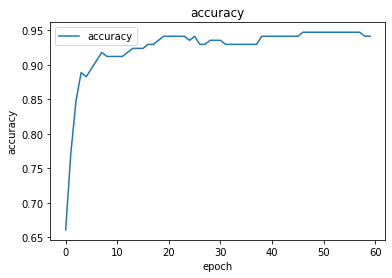

In [12]:
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

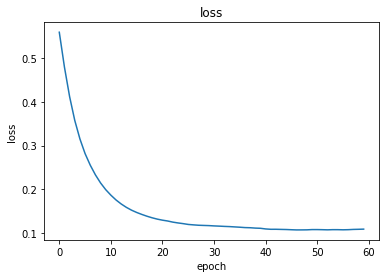

In [13]:
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

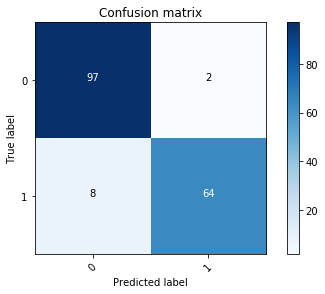

In [14]:
# Confusion matrix oluşturalım. 
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# x_test'in tahmin sonuçlarını alalım
y_pred = model.predict(X_test)
# y_pred'i one hot vektörüne çevirelim 
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1) 
# confusion matrix oluşturalım 
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# confusion matrix çizdirelim
plot_confusion_matrix(confusion_mtx, classes = range(2))

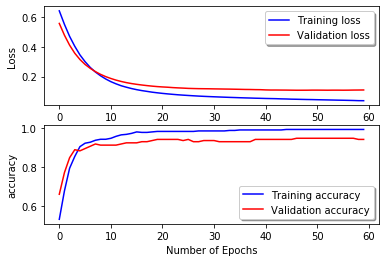

In [15]:
# Eğitimde gerçekleşen loss ve accuracy değerlerini çizdirelim
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].set_ylabel("Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_xlabel("Number of Epochs")
ax[1].set_ylabel("accuracy")
legend = ax[1].legend(loc='best', shadow=True)